## Import library

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Define path & total number

In [81]:
path = "../../.keras/datasets/cats_and_dogs_filtered"
path_cat = os.path.join(path, 'cat')
path_dog = os.path.join(path, 'dog')

class_names = ['cat', 'dog']

In [82]:
num_cats = len(os.listdir(path_cat))
num_dogs = len(os.listdir(path_dog))
total_img_num = num_cats + num_dogs
print('total cat images:', num_cats)
print('total dog images:', num_dogs)
print('total images:', total_img_num)

total cat images: 1500
total dog images: 1500
total images: 3000


## Train test split

In [83]:
batch_size = 200
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150
split = 0.2
total_val = total_img_num * split
total_train = total_img_num - total_val

In [79]:
# Generator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=split)

In [80]:
# Load images from the disk, applies rescaling, and resizes the images

train_generator = data_generator.flow_from_directory(
    directory=path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    directory=path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='validation') # set as validation data

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


## Labels

In [70]:
import collections

def count_label(generator):
    l = len(generator)
    counter = collections.Counter()
    for i in range(l):
        _, label = generator[i]
        unique, counts = np.unique(label, return_counts=True)
        count_label = dict(zip(unique, counts))
        counter.update(count_label) 
    result = dict(counter)
    return result

In [71]:
train_count = count_label(train_generator)
val_count = count_label(validation_generator)

print("Training labels:")
print(train_count)
print("Validation labels:")
print(val_count)

Training labels:
{0.0: 1200, 1.0: 1200}
Validation labels:
{0.0: 300, 1.0: 300}


## Sample visualisation

In [30]:
sample_img_train, sample_label_train = next(train_generator)

In [77]:
def plotImg(img, label):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i])
        plt.xlabel(class_names[int(label[i])])
    plt.show()

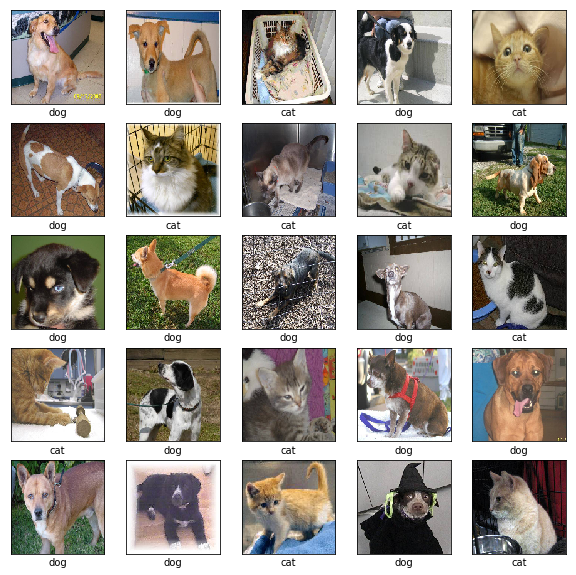

In [78]:
plotImg(sample_img_train, sample_label_train)

## Model

In [33]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

## Train model

In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/20
12/12 [==============================] - 43s 4s/step - loss: 1.0316 - acc: 0.5096 - val_loss: 0.6891 - val_acc: 0.5000
Epoch 2/20
12/12 [==============================] - 42s 4s/step - loss: 0.6854 - acc: 0.5462 - val_loss: 0.6774 - val_acc: 0.5967
Epoch 3/20
12/12 [==============================] - 44s 4s/step - loss: 0.6664 - acc: 0.5979 - val_loss: 0.6452 - val_acc: 0.6333
Epoch 4/20
12/12 [==============================] - 45s 4s/step - loss: 0.6497 - acc: 0.6100 - val_loss: 0.6302 - val_acc: 0.6417
Epoch 5/20
12/12 [==============================] - 47s 4s/step - loss: 0.6193 - acc: 0.6654 - val_loss: 0.5990 - val_acc: 0.6833
Epoch 6/20
12/12 [==============================] - 51s 4s/step - loss: 0.5817 - acc: 0.6938 - val_loss: 0.5867 - val_acc: 0.6800
Epoch 7/20
12/12 [==============================] - 52s 4s/step - loss: 0.5480 - acc: 0.7192 - val_loss: 0.5514 - val_acc: 0.6917
Epoch 8/20
12/12 [==============================] - 51s 4s/step - loss: 0.5135 - acc: 0.75

## Result visualisation 

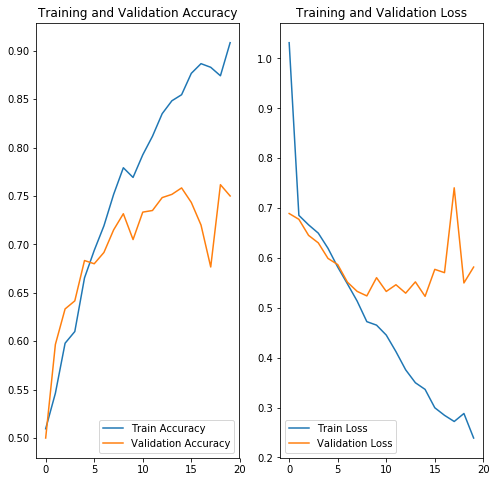

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

## Augmentation

In [84]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=split,
                                   horizontal_flip=True,
                                   zoom_range=0.5,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   rotation_range=45)

In [85]:
train_generator = data_generator.flow_from_directory(
    directory=path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    directory=path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='validation') # set as validation data

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


## New model (with dropout)

In [87]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [88]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 18, 18, 64)       

In [90]:
history = model_new.fit_generator(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size
)

Epoch 1/20
12/12 [==============================] - 64s 5s/step - loss: 0.9498 - acc: 0.5042 - val_loss: 0.6935 - val_acc: 0.4817
Epoch 2/20
12/12 [==============================] - 57s 5s/step - loss: 0.6930 - acc: 0.5054 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 3/20
12/12 [==============================] - 58s 5s/step - loss: 0.6928 - acc: 0.5033 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 4/20
12/12 [==============================] - 56s 5s/step - loss: 0.6913 - acc: 0.5192 - val_loss: 0.6914 - val_acc: 0.5167
Epoch 5/20
12/12 [==============================] - 60s 5s/step - loss: 0.6899 - acc: 0.5271 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 6/20
12/12 [==============================] - 57s 5s/step - loss: 0.6934 - acc: 0.5171 - val_loss: 0.6892 - val_acc: 0.5083
Epoch 7/20
12/12 [==============================] - 56s 5s/step - loss: 0.6870 - acc: 0.5217 - val_loss: 0.6846 - val_acc: 0.6150
Epoch 8/20
12/12 [==============================] - 62s 5s/step - loss: 0.6741 - acc: 0.58

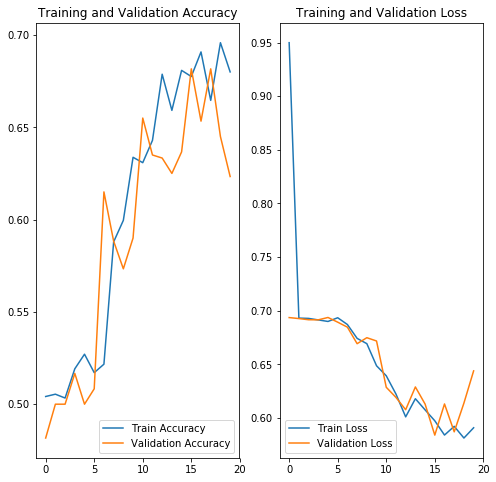

In [91]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()